# **Student Performance Indicator**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Muhammad Adil Naeem</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-green?style=for-the-badge&logo=github)](https://github.com/muhammadadilnaeem) [![Twitter/X](https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter)](https://twitter.com/adilnaeem0) [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-adil-naeem-26878b2b9/)  

---

## **Lifecycle of this Machine Learning Project**

- **Understanding the Problem Statement**
   
- **Data Exploration**
  
- **Data Visualization**
  
- **Data Cleaning**
  
- **Data Preprocessing**
  
- **Model Building**
  
- **Model Evaluation**

- **Choosing Best Machine Learning Model**

---

## **Understanding Problem Statement**
- This project understands how student's performance (exam scores) is affected by other variables such as **Gender**, **Ethinicity**, **Parental Level of Education** and **Lunch and Test Preparation Course.** 

## **Data Exploration**

- The data used for this project is obtained from the [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977) Dataset. 
- This dataset consist of **8 Columns** and **1000 rows**.

Here's a tabular representation of the dataset:

| **Attribute**                    | **Description**                                      | **Possible Values**                                                |
|----------------------------------|------------------------------------------------------|--------------------------------------------------------------------|
| **gender**                       | Sex of students                                      | Male, Female                                                       |
| **race_ethnicity**               | Ethnicity of students                                | Group A, Group B, Group C, Group D, Group E                        |
| **parental_level_of_education**  | Parents' final education                             | Bachelor's degree, Some college, Master's degree, Associate's degree, High school |
| **lunch**                        | Having lunch before test                             | Standard, Free/reduced                                             |
| **test_preparation_course**      | Completion of test preparation course                | Complete, Not complete                                             |
| **math_score**                   | Score in math                                        | Numeric value                                                      |
| **reading_score**                | Score in reading                                     | Numeric value                                                      |
| **writing_score**                | Score in writing                                     | Numeric value                                                      |


#### **Importing Required Libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

#### **Load the Dataset**

In [62]:
df = pd.read_csv(r"E:\Practice python\Krish Naik\End to End Data Science Playlist\ML Project\notebook\dataset\stud.csv")

#### **Let's Take a look at First 5 Rows**

In [63]:
df.head(5) 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### **Shape of the Dataset**

In [64]:
print(f"This dataset consist of {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset consist of 1000 rows and 8 columns.


----------

### **Data Checks to perform**

- **Check Missing values**
- **Check Duplicates**
- **Check data type**
- **Check the number of unique values of each column**
- **Check statistics of data set**
- **Check various categories present in the different categorical column**
-----------

### **Check Missing values**

In [65]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- There are no missing values in the dataset.

### **Check Duplicates**

In [66]:
df.duplicated().sum()

0

- This dataset has no duplicates.

### **Check Datatypes**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### **Check No of Unique Values**

In [68]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### **Check Statistics of Dataset**

In [69]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### **Insight**
- From above description of numerical data, all **means** are very close to each other - **between 66 and 68.05**
  
- All **standard deviations** are also close - **between 14.6 and 15.19**
  
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### **Check various categories present in the different categorical column**

In [70]:
print("Categories in 'gender' variable:  ",end=" " )
print(df['gender'].unique())

Categories in 'gender' variable:   ['female' 'male']


In [71]:
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']


In [72]:
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [73]:
print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

Categories in 'lunch' variable:  ['standard' 'free/reduced']


In [74]:
print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'test preparation course' variable:  ['none' 'completed']


### **Define Numerical Columns** 

In [75]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']


### **Define Categorical Columns** 

In [76]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### **Adding columns for "Total Score" and "Average"**

In [77]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### **Checking Students with Full Marks**

In [78]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


### **Checking Students with less than 20 Marks**

In [79]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


----

## **Data Visualization**

---

#### **Histogram & KDE**

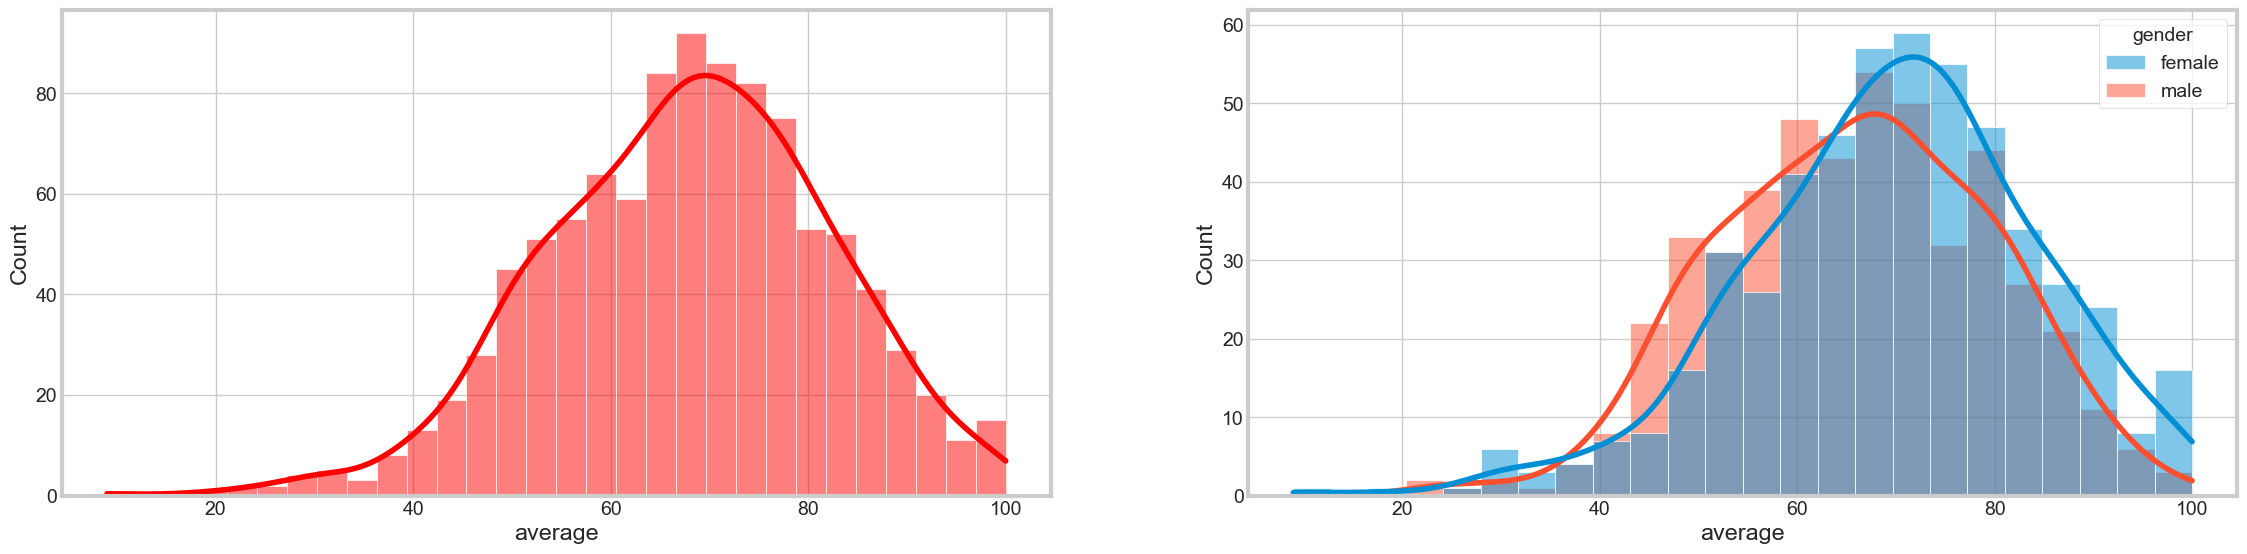

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(25, 6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

**Insight:**

- Most of the students have score between 60 and 80
- Most of the students are female and have score between 60 and 80.

### **Plotting the distribution of total score in each class**

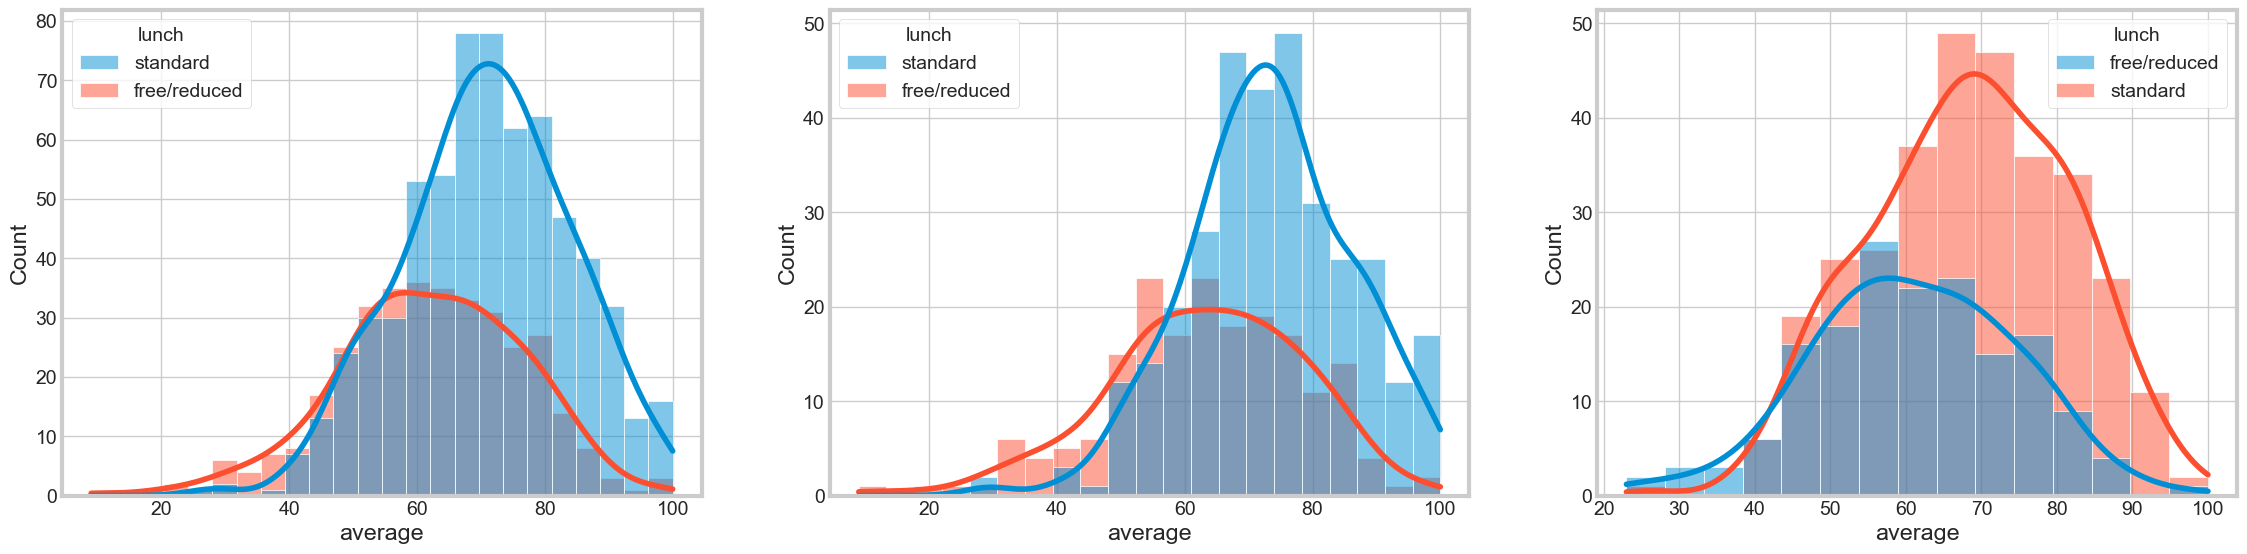

In [81]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

#####  **Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

####  **Plotting the distribution of total score in each parent's education**

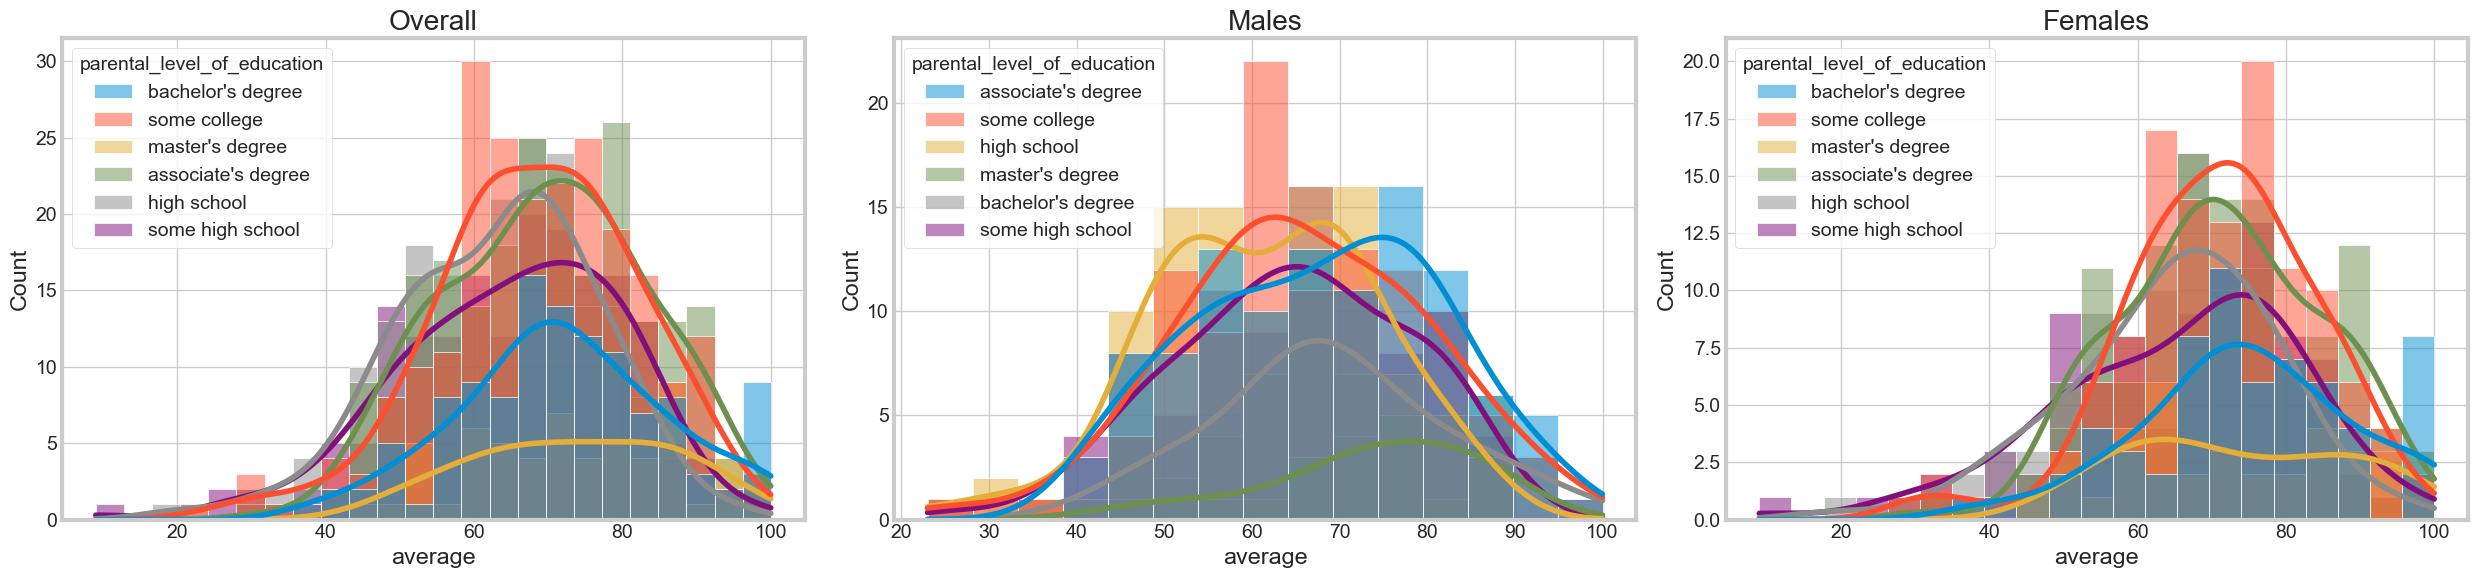

In [82]:
plt.figure(figsize=(25, 6))

# Plot 1: Overall histogram
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title('Overall')

# Plot 2: Histogram for males
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Males')

# Plot 3: Histogram for females
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Females')

plt.tight_layout()
plt.show()

#####  **Insights**
- In general parent's education don't help student perform well in exam.
  
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
  
- 3rd plot we can see there is no effect of parent's education on female students.

### **Plotting the distribution of total score in each race-ethnicity**

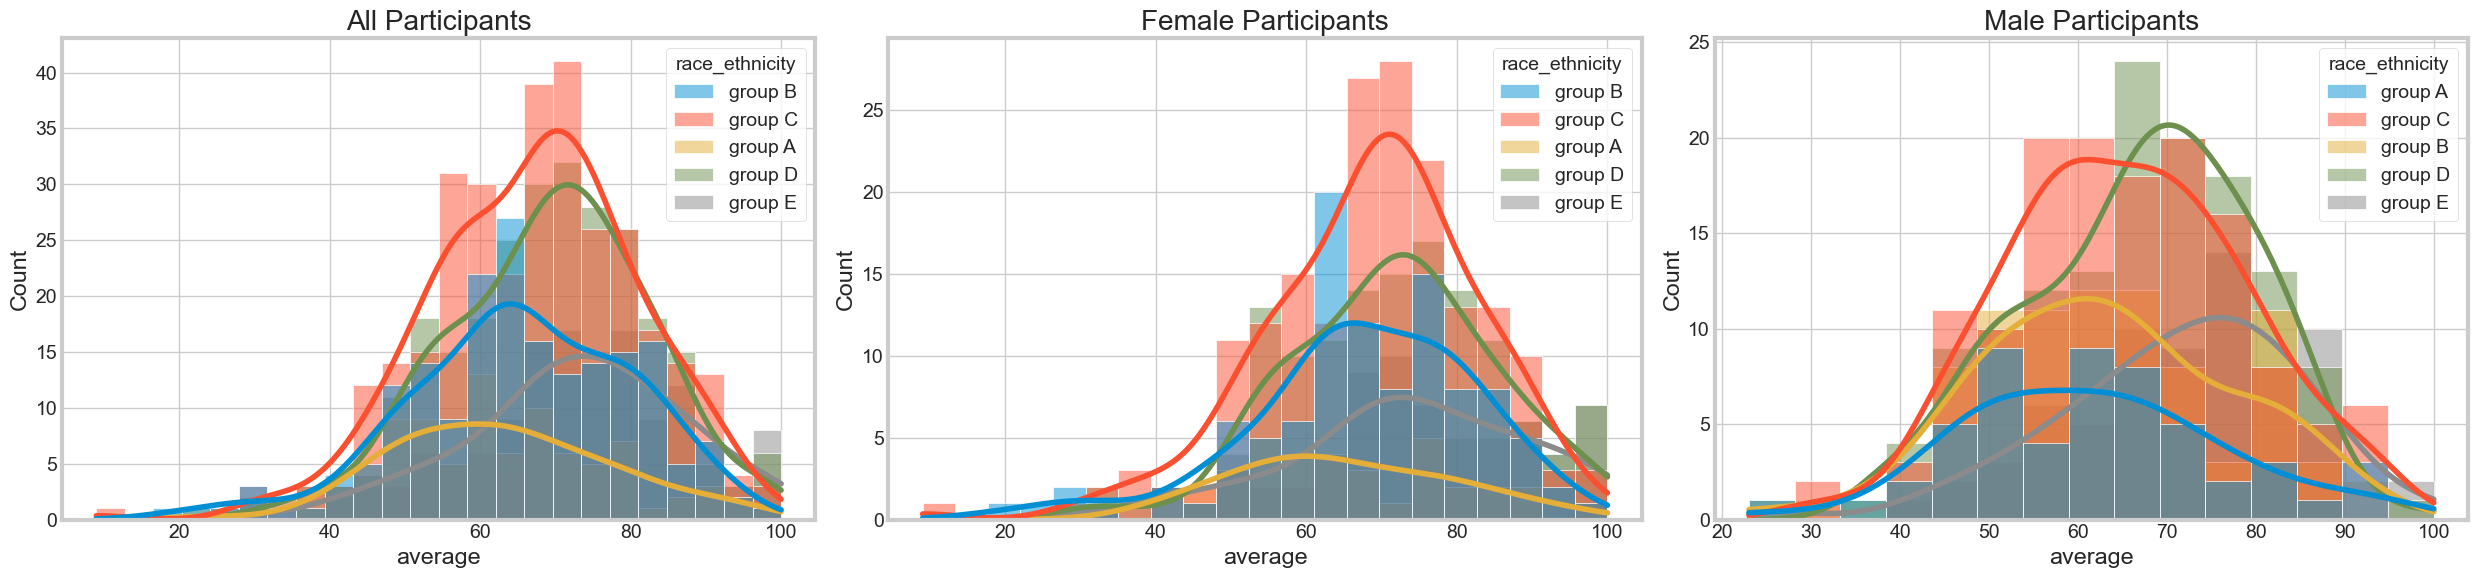

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))

ax1.set_title('All Participants')
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=ax1)

ax2.set_title('Female Participants')
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity', ax=ax2)

ax3.set_title('Male Participants')
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity', ax=ax3)

plt.tight_layout()

#####  **Insights**

- Students of group A and group B tends to perform poorly in exam.
  
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### **Maximumum score of students in all three subjects**

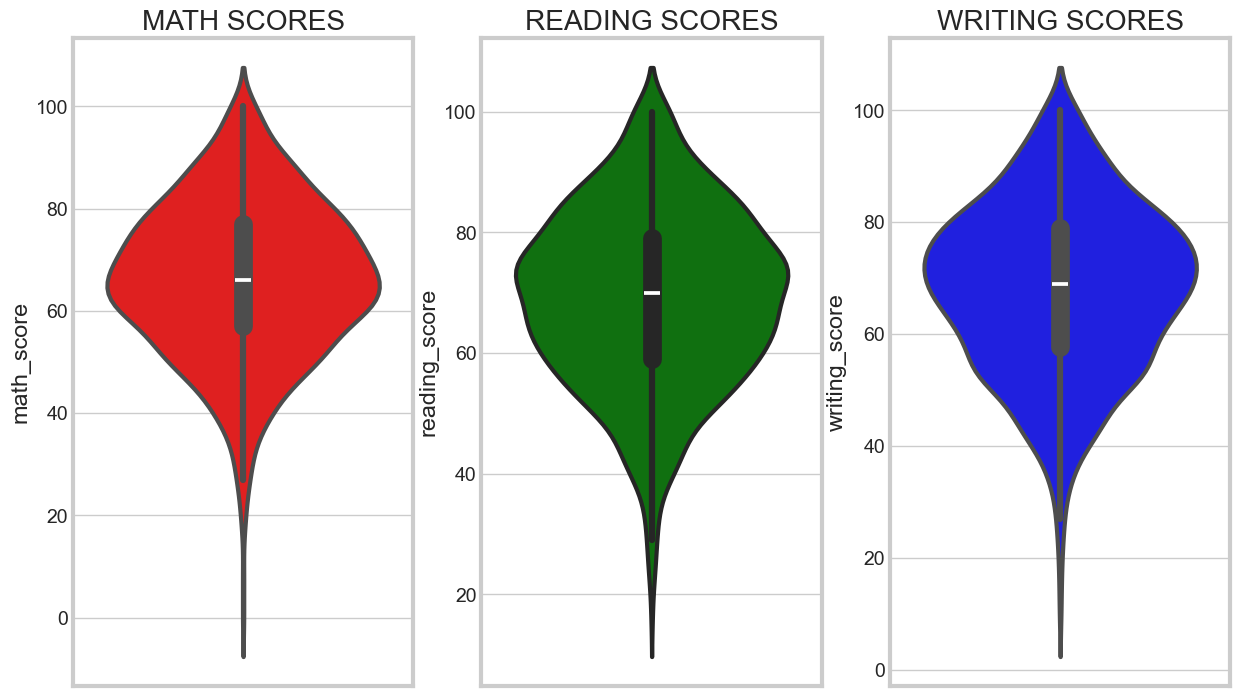

In [84]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### **Insights**

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

### **Multivariate analysis using pieplot**

#### **For Gender**

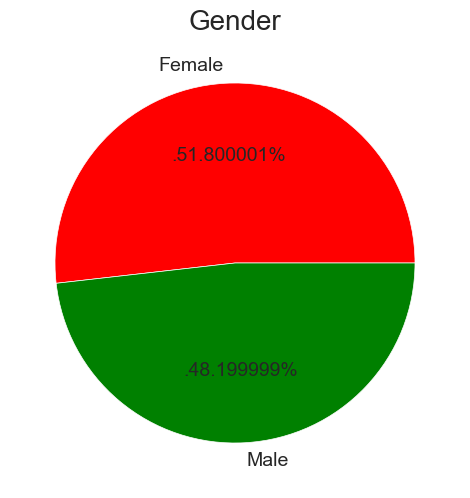

In [85]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

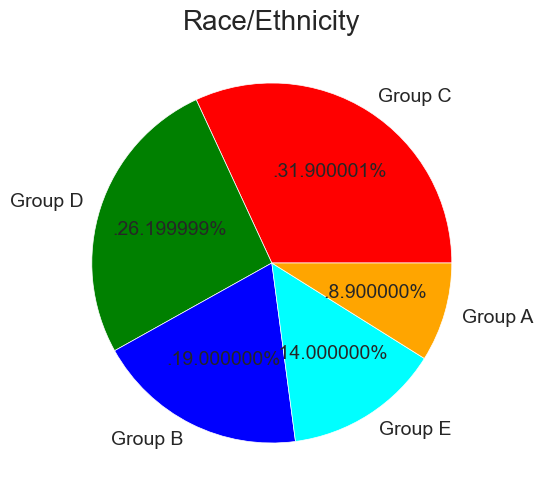

In [86]:
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')
plt.show()

#### **For Lunch**

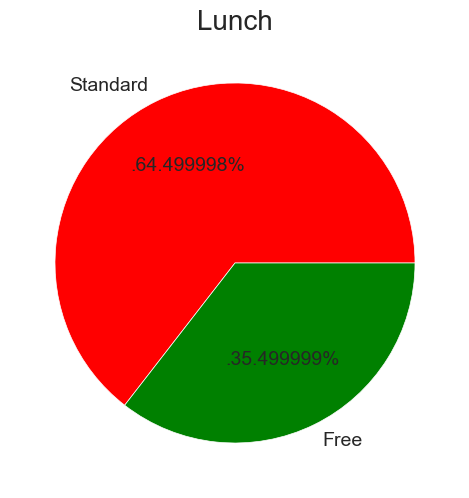

In [87]:
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')
plt.show()

#### **Test Course**

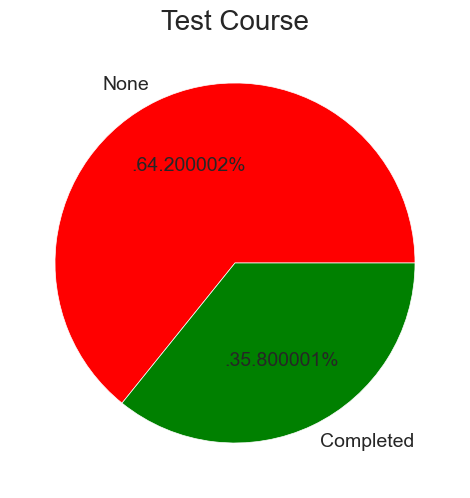

In [88]:
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.show()

#### **For Parental Education**

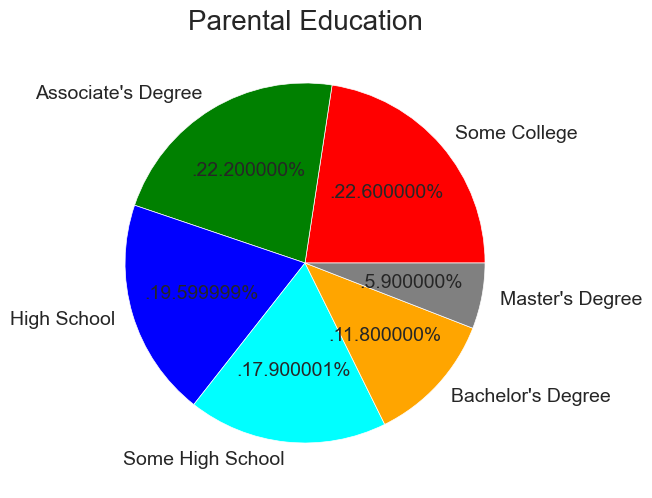

In [89]:
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')
plt.show()

#####  **Insights**
- Number of Male and Female students is almost equal.
  
- Number students are greatest in Group C.
  
- Number of students who have standard lunch are greater.
  
- Number of students who have not enrolled in any test preparation course is greater.
  
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

----

## **Feature Wise Visualization**
#### **gender Column**
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

### **UNIVARIATE ANALYSIS ( How is distribution of Gender ? )**

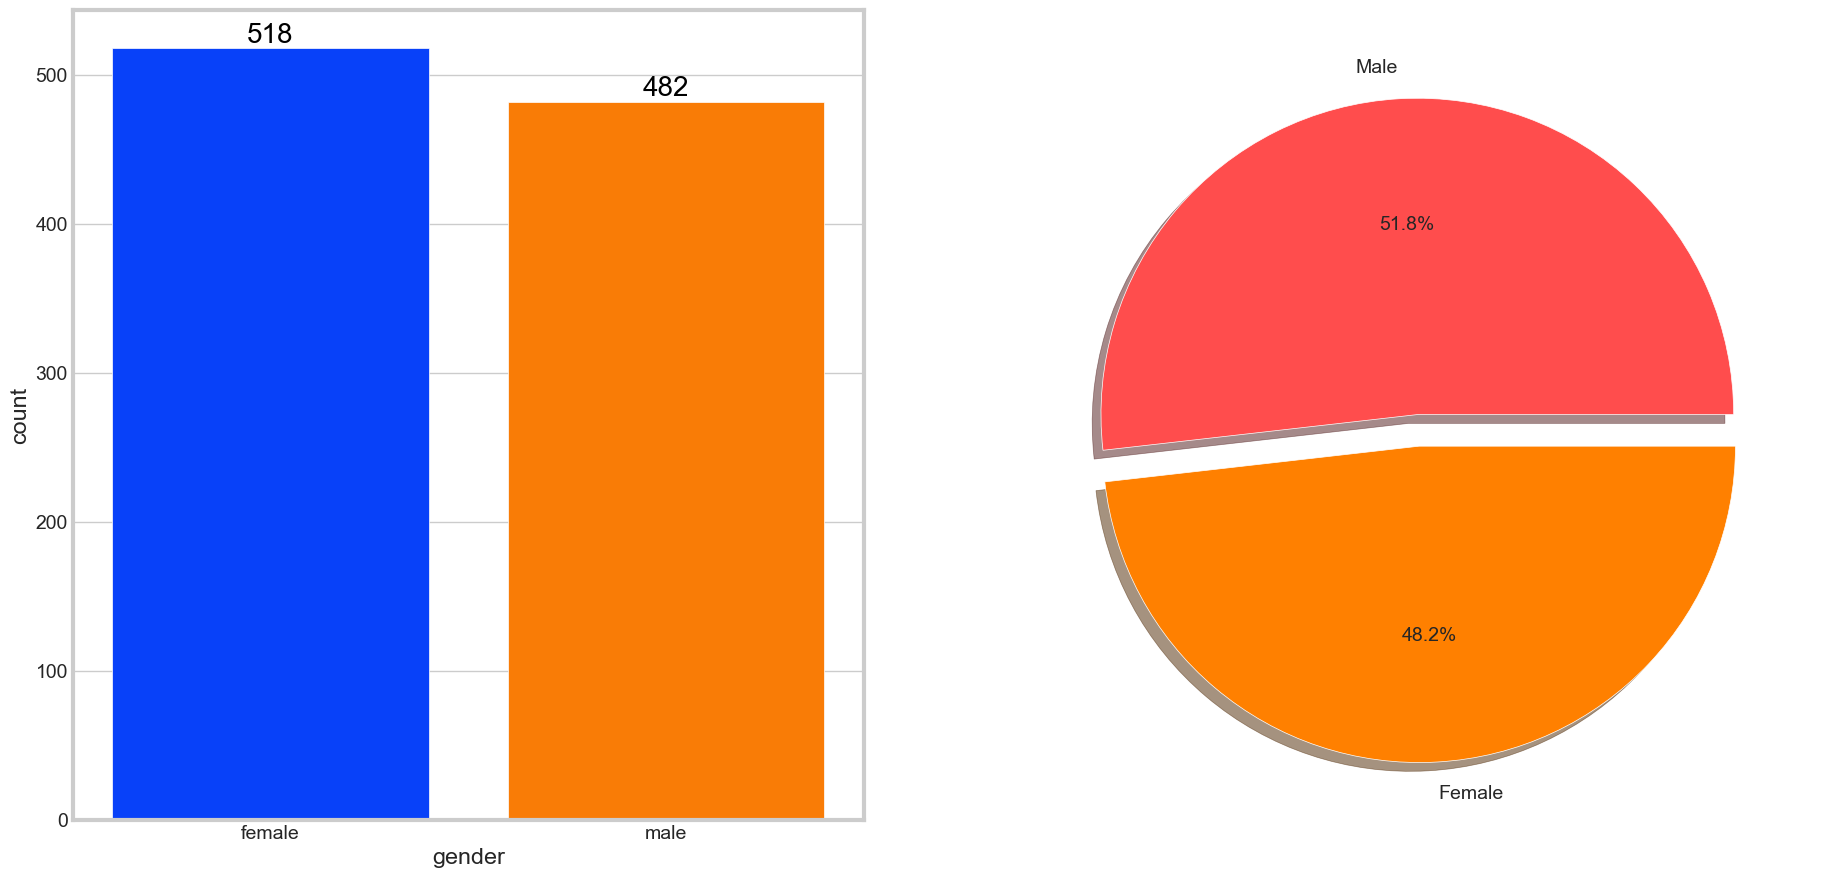

In [90]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### **Insights**

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

----

### **BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [91]:
# Convert 'gender' column to categorical
df['gender'] = df['gender'].astype('category')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# Select only numeric columns for the groupby operation
numeric_df = df.select_dtypes(include=['number'])

# Group by 'gender' and calculate mean
gender_group = numeric_df.groupby('gender').mean()
print(gender_group)

        math_score  reading_score  writing_score  total score    average
gender                                                                  
0        63.633205      72.608108      72.467181   208.708494  69.569498
1        68.728216      65.473029      63.311203   197.512448  65.837483


#### **Plotting Total average v/s Math average marks of both the genders**

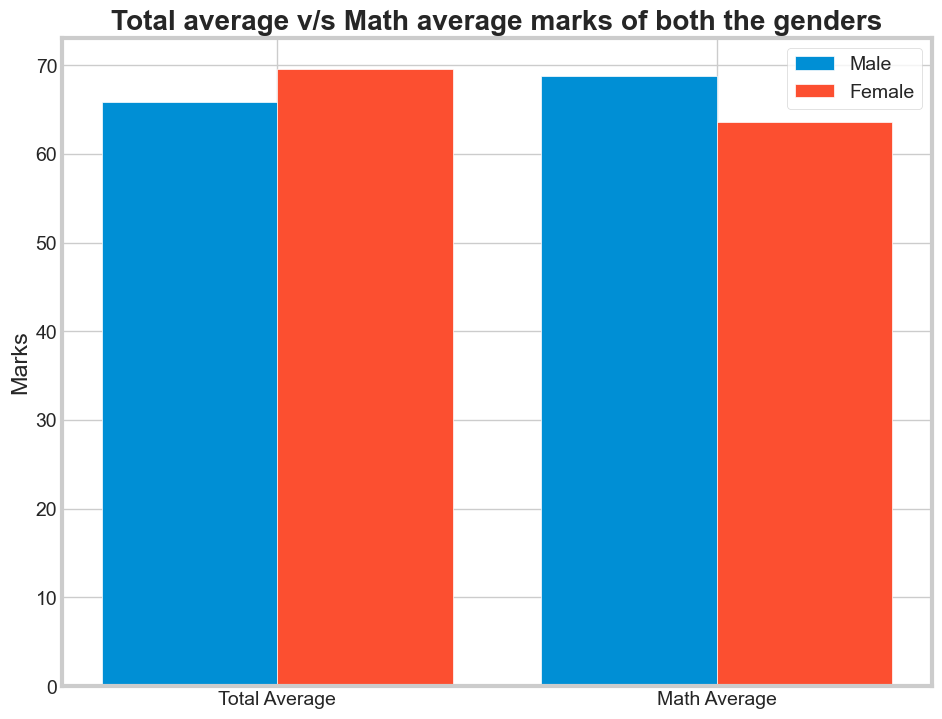

In [92]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### **Insights**

- On an average females have a better overall score than men.
  
- Whereas males have scored higher in Maths.

###  **RACE/EHNICITY COLUMN**

- How is Group wise distribution ?
  
- Is Race/Ehnicity has any impact on student's performance?

#### **UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**

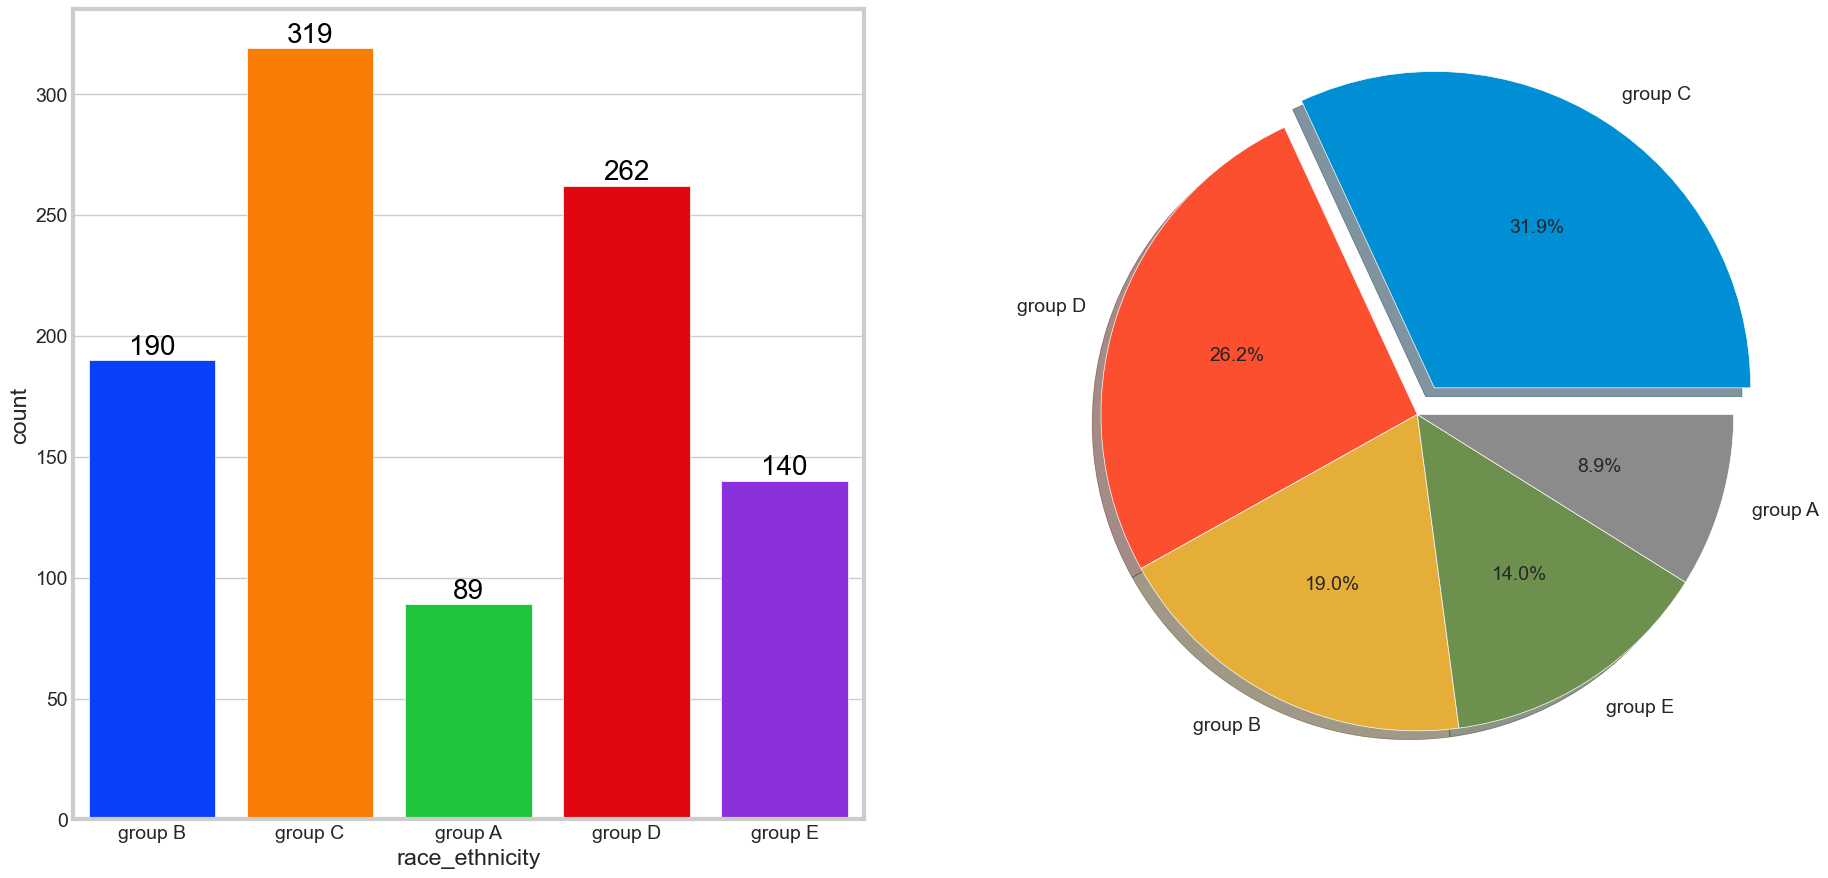

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### **Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### **BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**

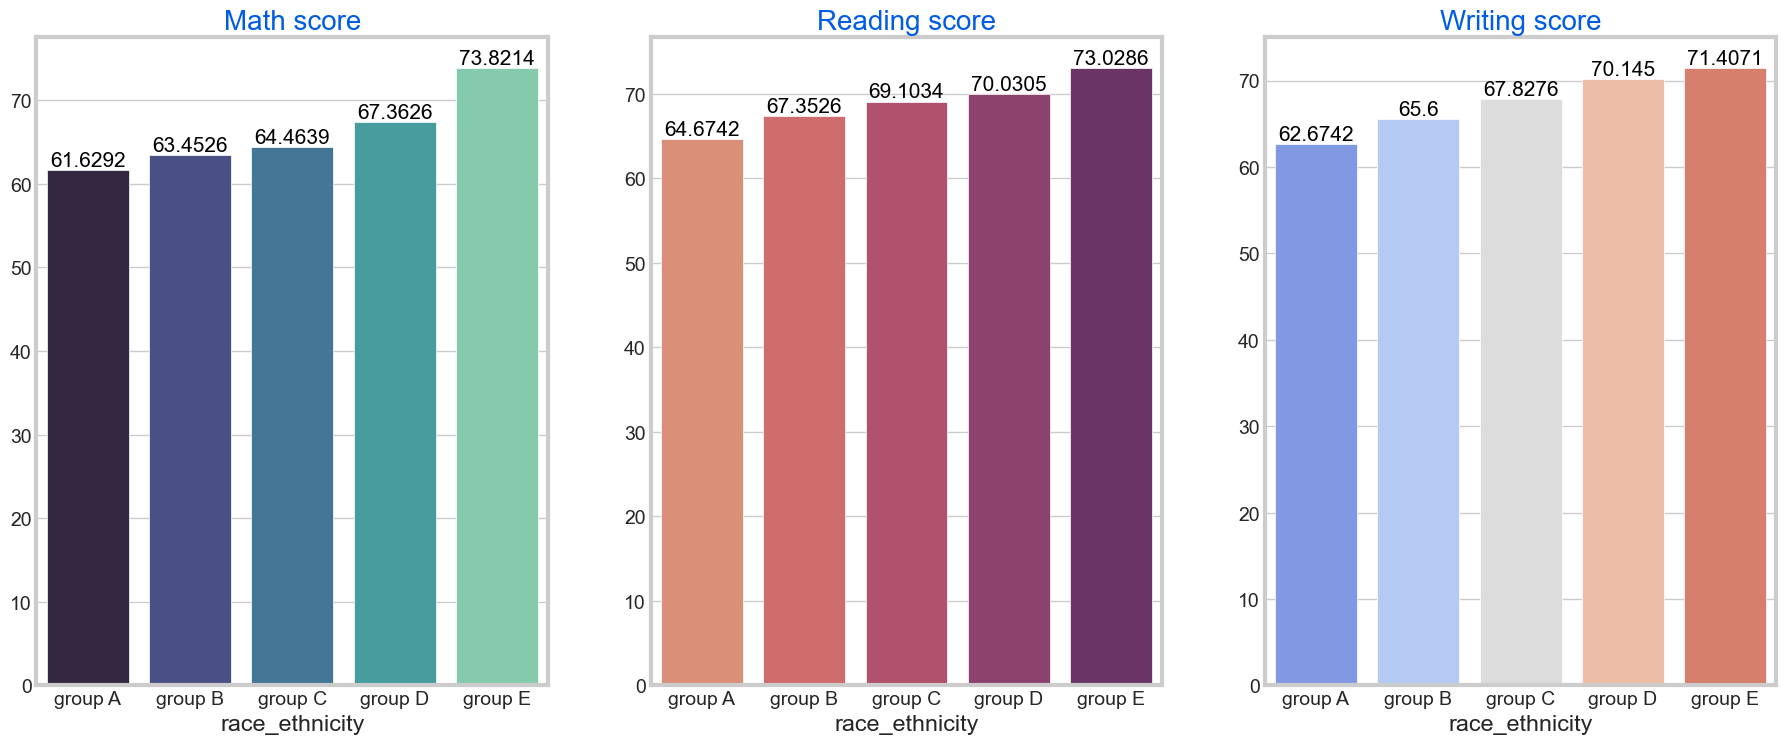

In [94]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### **Insights**
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects.

### **PARENTAL LEVEL OF EDUCATION COLUMN**
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

##### **UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

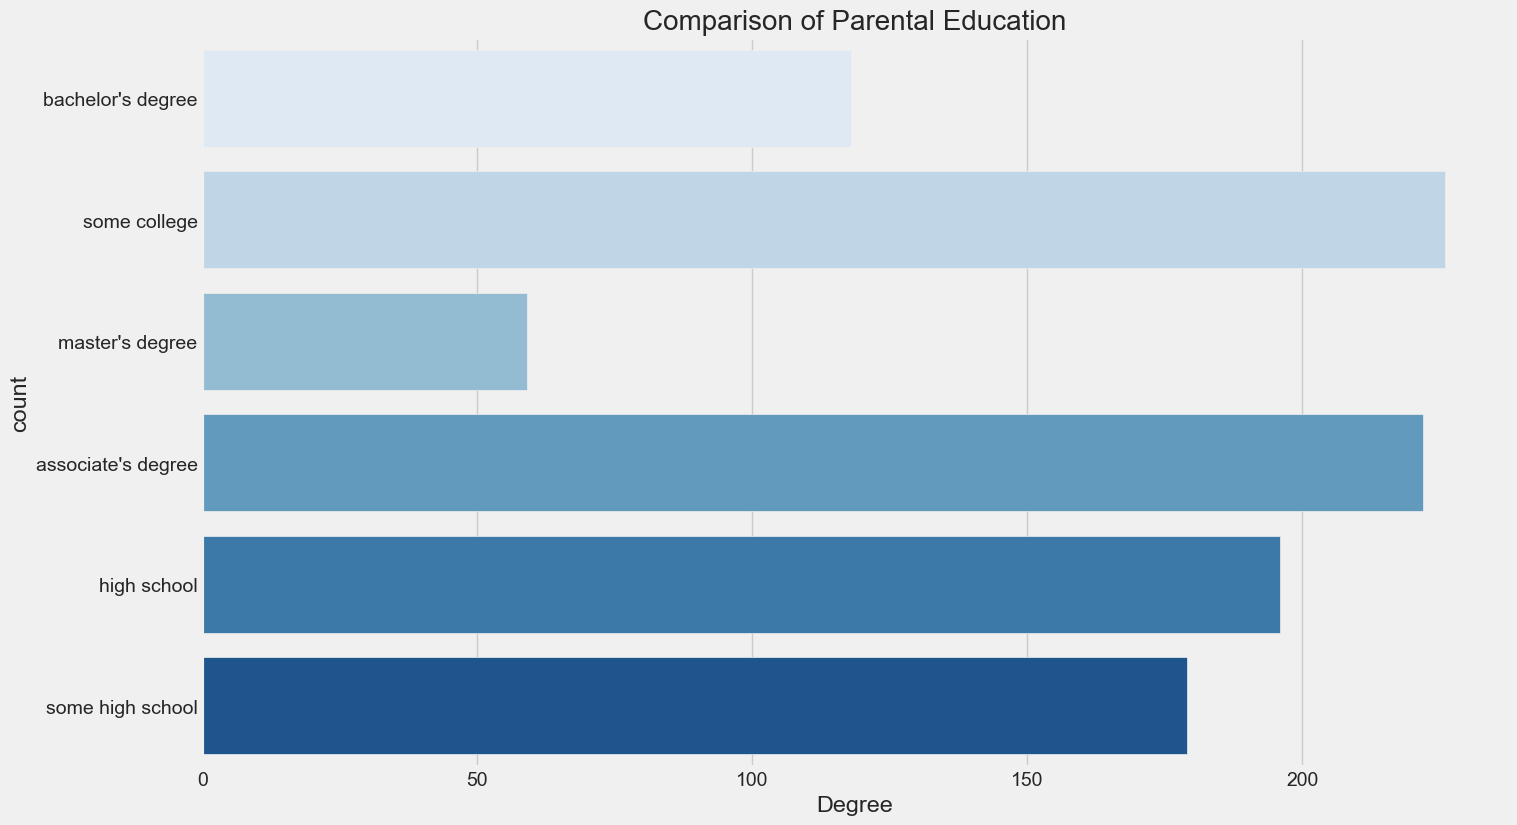

In [95]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### **Insights**
- Largest number of parents are from some college.

#### **BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )**

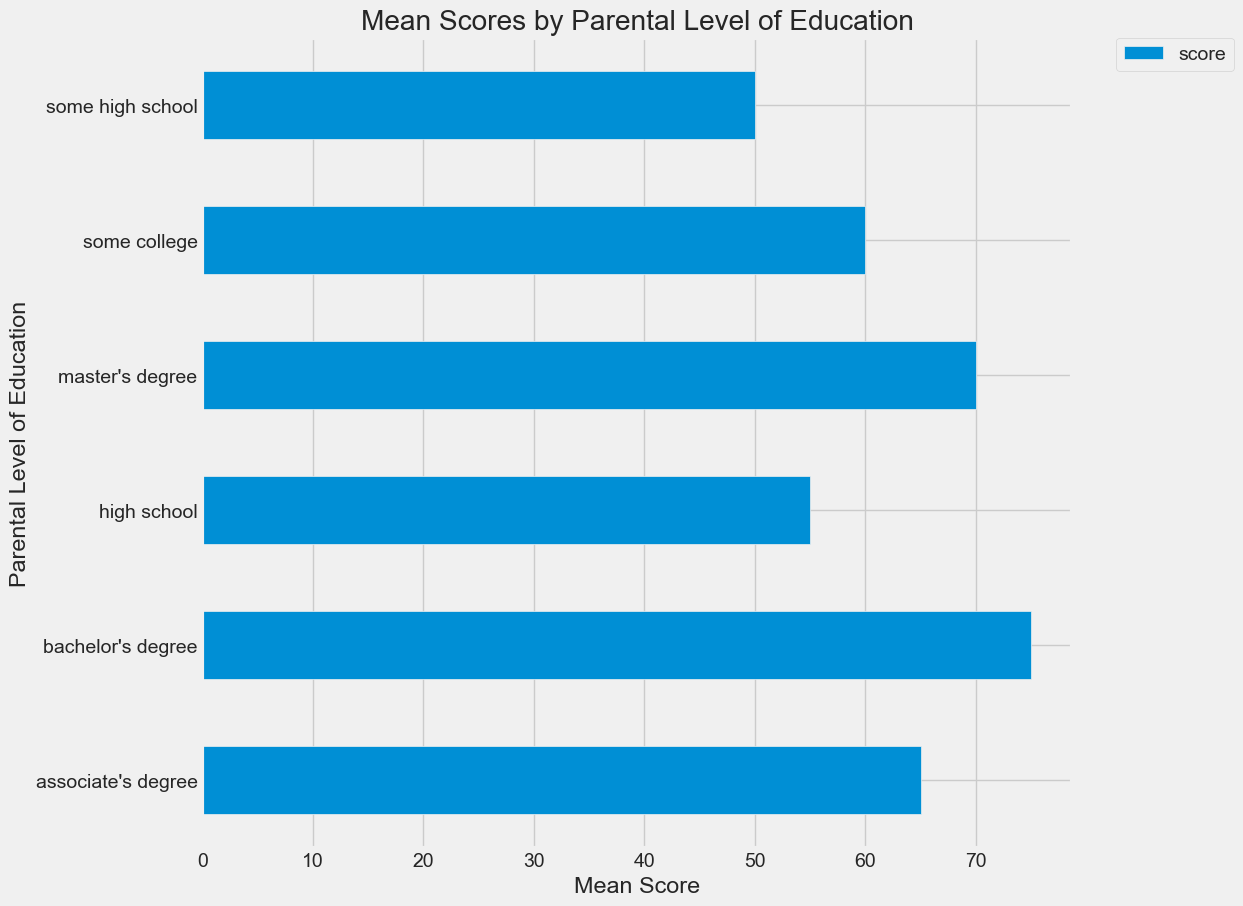

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (Replace with your actual DataFrame)
data = {
    'parental_level_of_education': [
        'bachelor\'s degree', 'some college', 'master\'s degree', 
        'associate\'s degree', 'high school', 'some high school'
    ],
    'score': [75, 60, 70, 65, 55, 50]
}
df1 = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'parental_level_of_education' column
df1['parental_level_of_education_encoded'] = label_encoder.fit_transform(df1['parental_level_of_education'])

# Ensure only numeric columns are used for aggregation
grouped_df = df1.groupby('parental_level_of_education_encoded').mean(numeric_only=True)

# Map the encoded values back to their original labels
grouped_df['parental_level_of_education'] = label_encoder.inverse_transform(grouped_df.index)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
grouped_df.plot(kind='barh', x='parental_level_of_education', y='score', ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Mean Score')
ax.set_ylabel('Parental Level of Education')
ax.set_title('Mean Scores by Parental Level of Education')

# Show the plot
plt.show()


#### **Insights**
- The score of student whose parents possess master and bachelor level education are higher than others.

---

### **LUNCH COLUMN**
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### **UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**

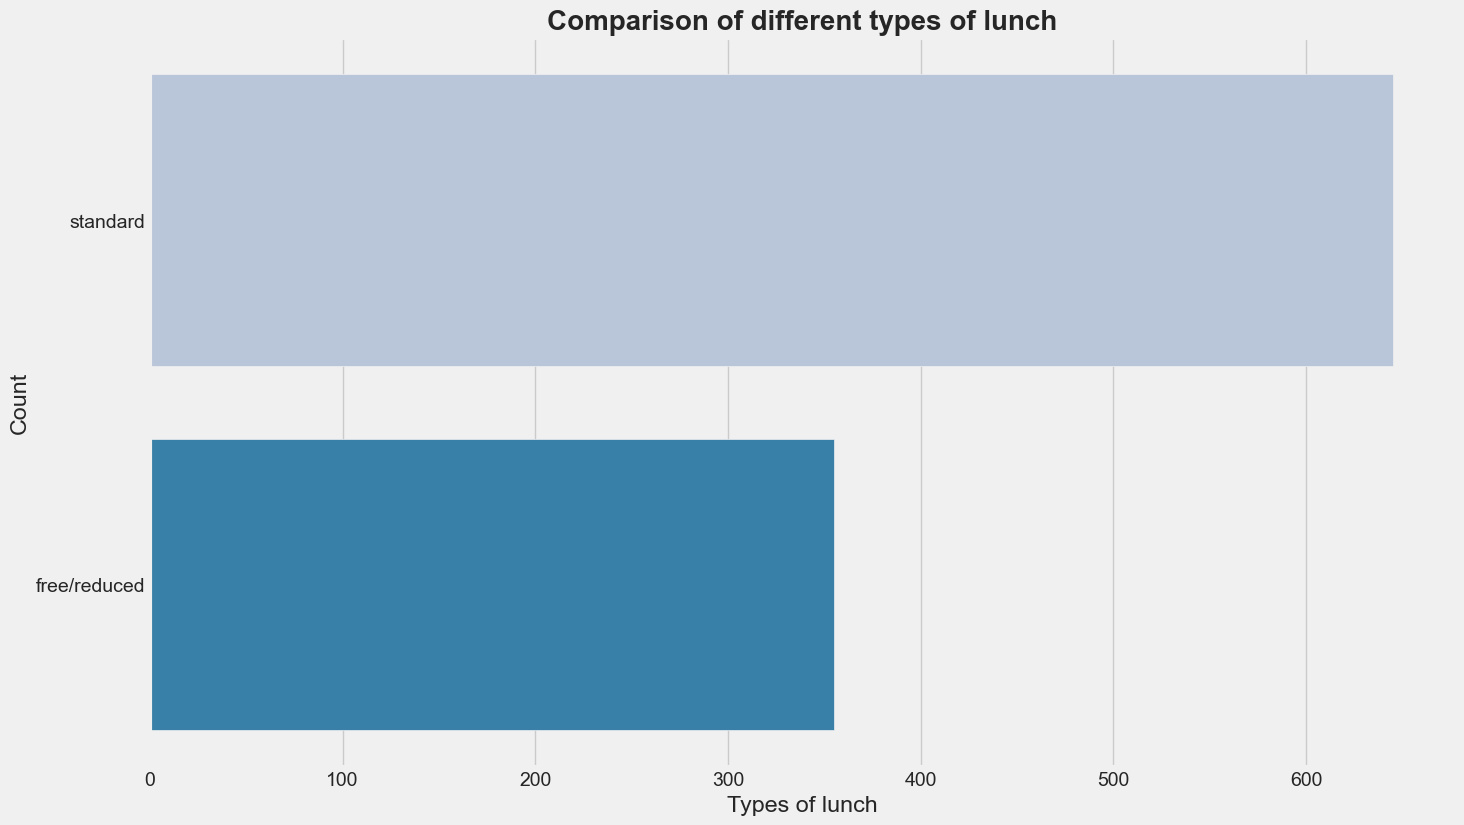

In [97]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')  # Using 'ggplot' as an alternative style
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

#### **Insights**
- Students being served Standard lunch was more than free lunch.

#### **BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )**

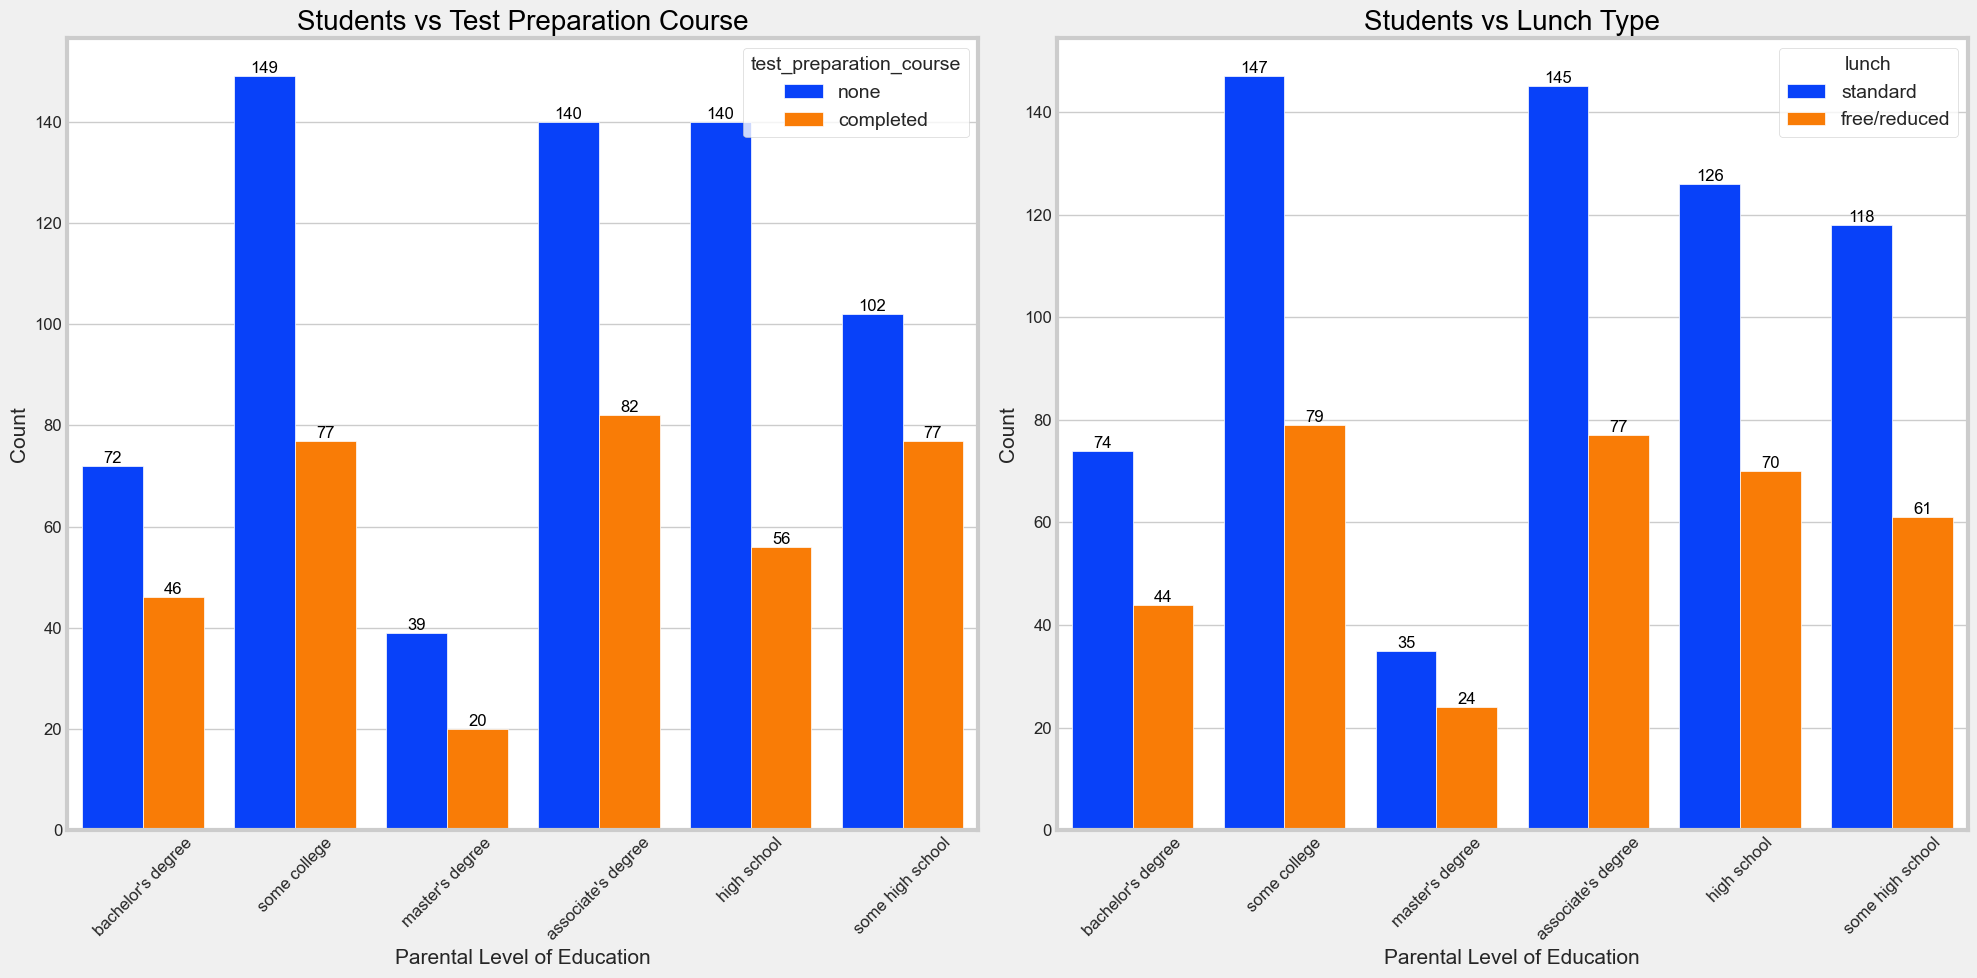

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# f,ax=plt.subplots(1,2,figsize=(18,8))

# Adjust layout and style
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

# Plot for test preparation course
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_preparation_course', saturation=0.95)
plt.title('Students vs Test Preparation Course', color='black', size=20)
plt.xlabel('Parental Level of Education', size=15)
plt.ylabel('Count', size=15)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', color='black', size=12)

# Plot for lunch
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', saturation=0.95)
plt.title('Students vs Lunch Type', color='black', size=20)
plt.xlabel('Parental Level of Education', size=15)
plt.ylabel('Count', size=15)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', color='black', size=12)

# Adjust layout
plt.tight_layout()
plt.show()


#### **Insights** 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

----

### **TEST PREPARATION COURSE COLUMN** 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### **BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )**

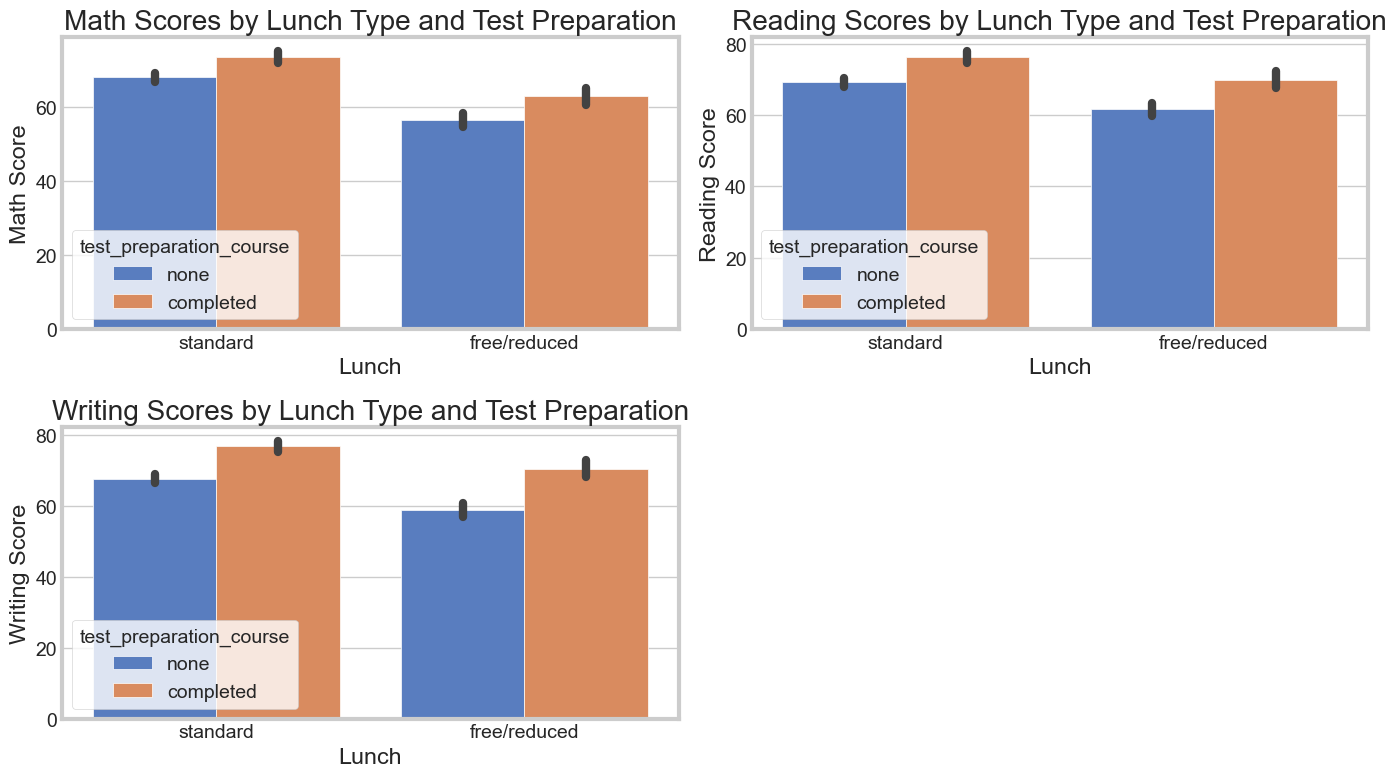

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(14,8))

# First subplot - Math Scores
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, palette='muted')
plt.title('Math Scores by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Math Score')

# Second subplot - Reading Scores
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, palette='muted')
plt.title('Reading Scores by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Reading Score')

# Third subplot - Writing Scores
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, palette='muted')
plt.title('Writing Scores by Lunch Type and Test Preparation')
plt.xlabel('Lunch')
plt.ylabel('Writing Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### **Insights**  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

-----

### **CHECKING OUTLIERS**

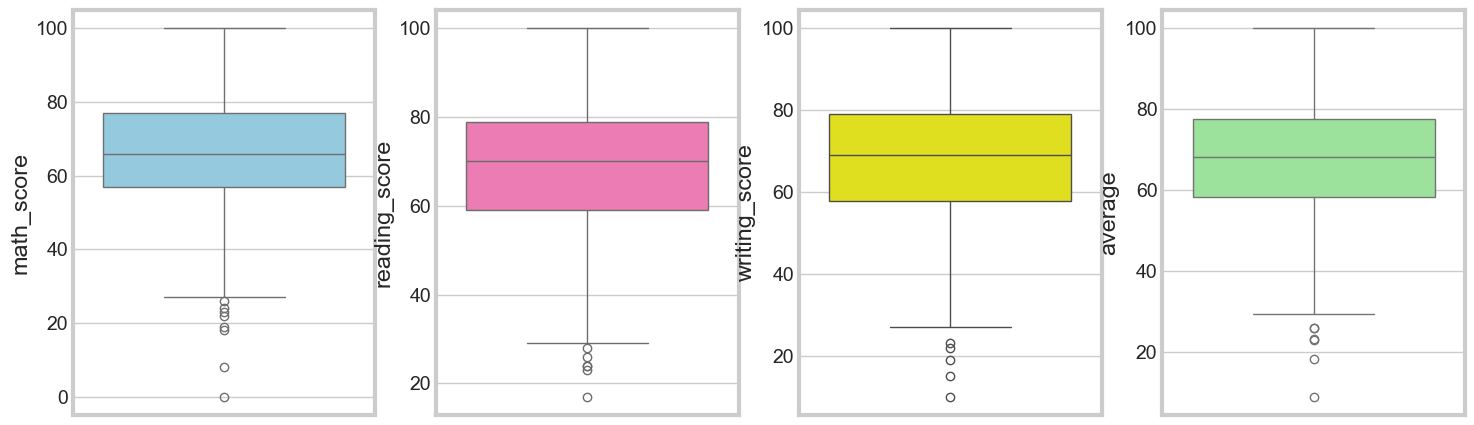

In [100]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### **MUTIVARIATE ANALYSIS USING PAIRPLOT**

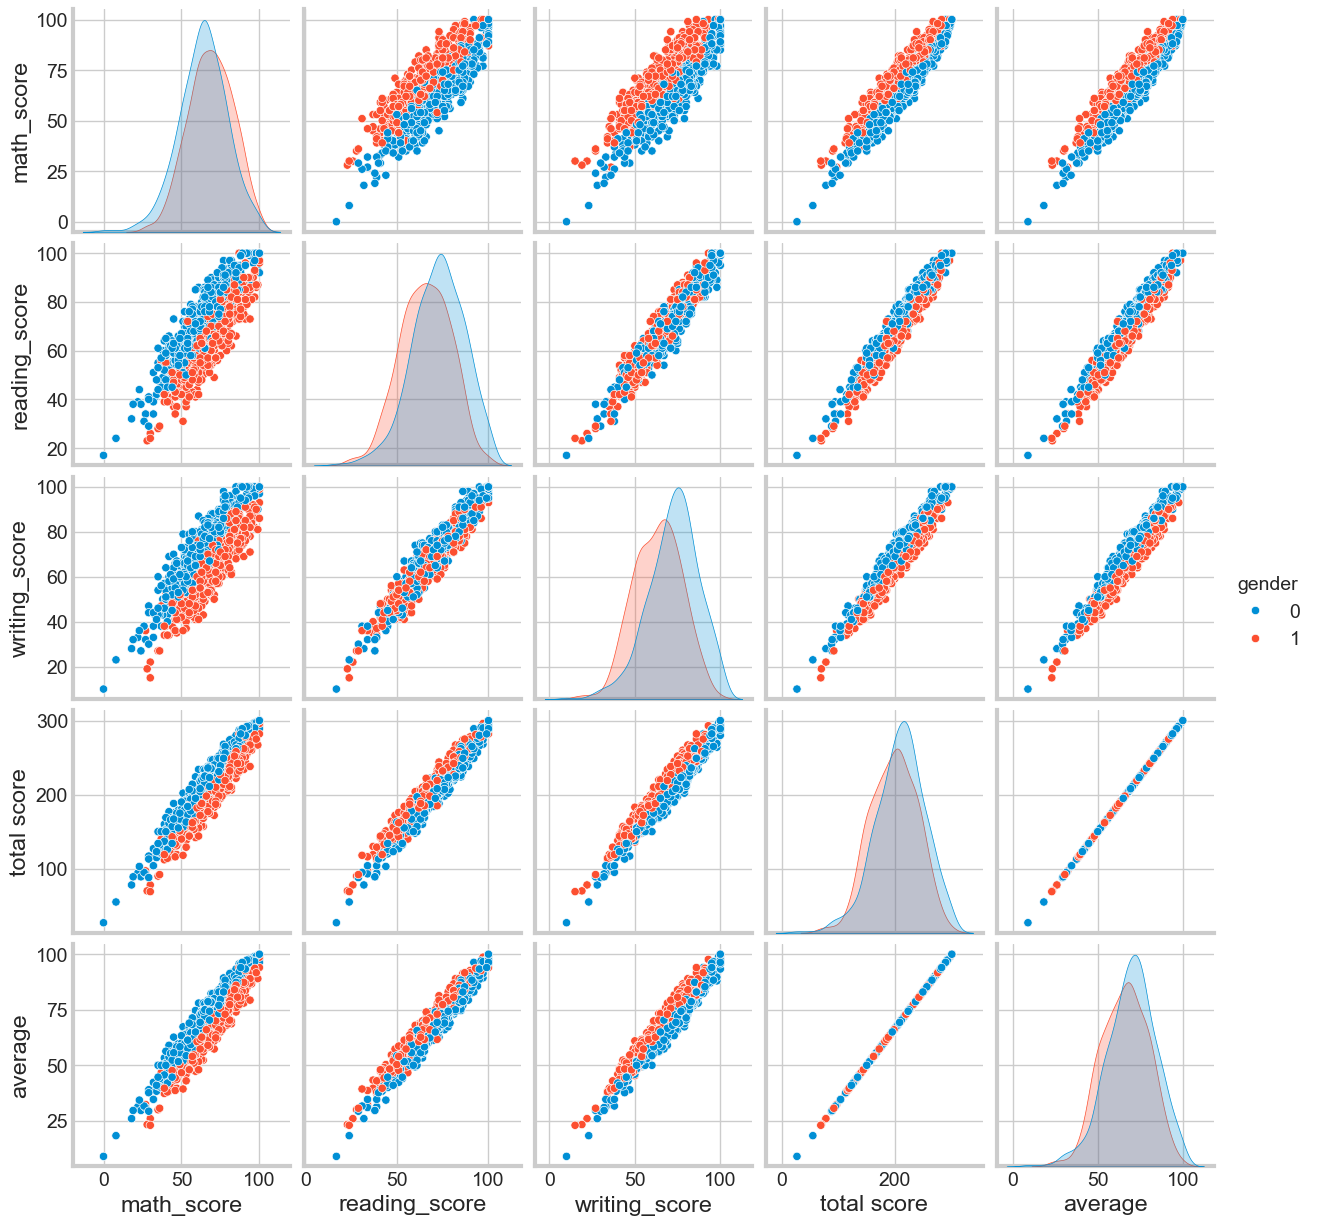

In [101]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### **Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

# **Conclusions**
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

------
------

# **Model Training**

#### **Importing Libraries**

In [102]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### **Load the dataset**

In [103]:
df = pd.read_csv(r"E:\Practice python\Krish Naik\End to End Data Science Playlist\ML Project\notebook\dataset\stud.csv")

### **Take a look at first 5 rows of dataset**

In [104]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### **Preparing X and Y variables**

In [105]:
X = df.drop(columns=['math_score'],axis=1) # dropping the target variable

In [106]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [107]:
y = df['math_score'] # target variable 

In [108]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

#### **Seprating Numerical and Categorical Features**

In [109]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

#### **Create Column Transformer with 3 types of transformers**

In [110]:
numeric_transformer = StandardScaler() # standardize the data by removing the mean and scaling to unit variance
oh_transformer = OneHotEncoder() # convert categorical variable into dummy/indicator variables

preprocessor = ColumnTransformer( 
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [111]:
X = preprocessor.fit_transform(X)

In [112]:
X.shape

(1000, 19)

In [113]:
y.shape

(1000,)

### **Separate dataset into train and test**

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### **Create an Evaluate Function to give all metrics after model Training**

In [115]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [116]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))): # loop through all models
    model = list(models.values())[i] # select model 
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i]) # Print model name
    model_list.append(list(models.keys())[i]) # Append model name
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) # :.4f is used to print upto 4 decimal places
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) # .format(model_train_mae) is used to print the model_train_mae
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35) # *35 is used to print '=' 35 times
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

### **Results**

In [117]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.853444
8,AdaBoost Regressor,0.852088
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.740362


## **Linear Regression**

In [118]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## **Plot y_pred and y_test**

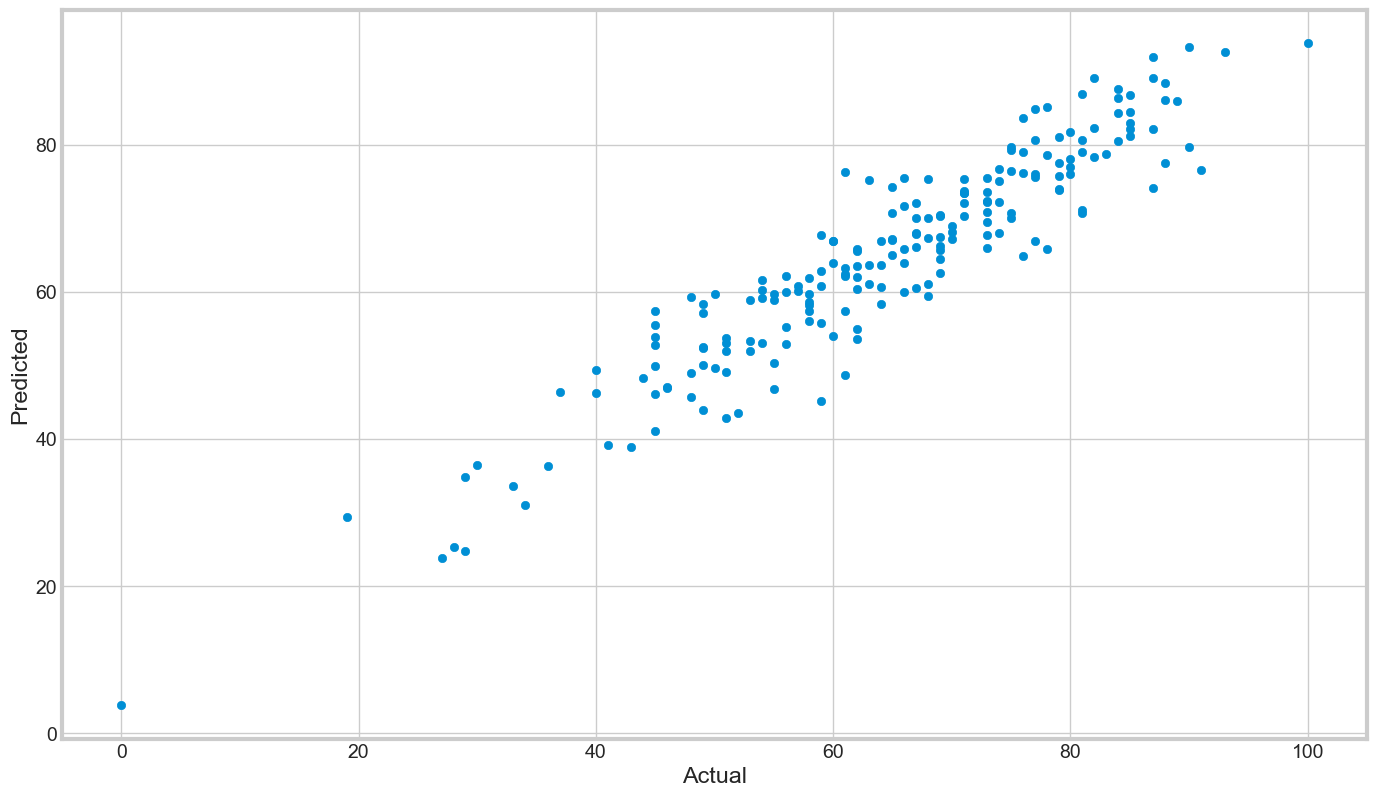

In [119]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

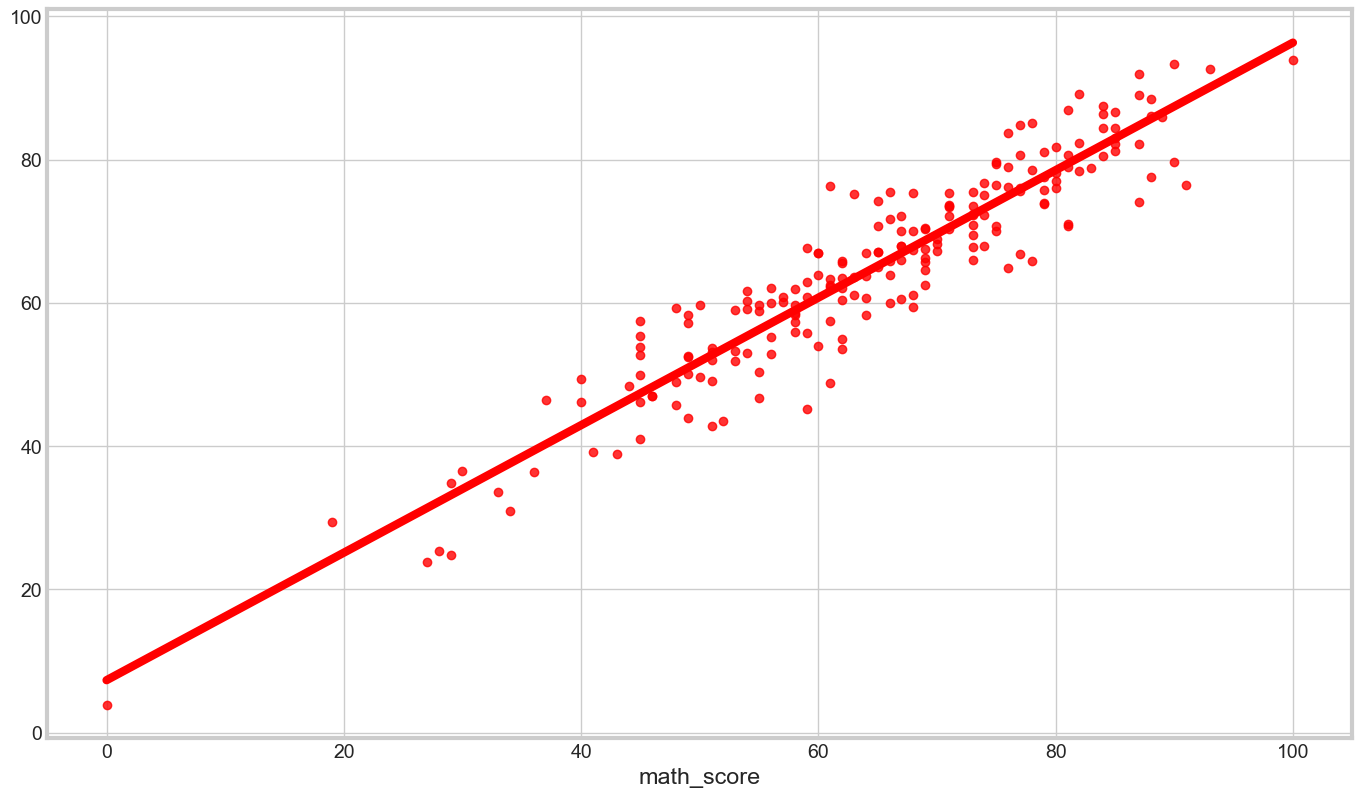

In [120]:
# Residuals Plot
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red'); # ci=None removes the shaded region

#### **Difference between Actual and Predicted Values**

In [121]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


In [122]:
# save the model
import pickle
pickle.dump(lin_model, open('model.pkl', 'wb'))
